# Model From Scratch Training for Comparision with transfer learning

In [1]:
import warnings
warnings.filterwarnings("ignore")
import tensorflow as tf
import matplotlib.pyplot as plt
tf.compat.v1.set_random_seed(0)
from tensorflow import keras
import numpy as np
np.random.seed(0)
import itertools
from keras.preprocessing.image import image_dataset_from_directory
from tensorflow.keras.layers.experimental.preprocessing import Rescaling
from sklearn.metrics import precision_score, accuracy_score, recall_score, confusion_matrix, ConfusionMatrixDisplay

2022-05-29 20:44:00.611026: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-05-29 20:44:00.611051: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
print(tf.__version__)

2.8.0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# ***Data Loading***

In [6]:
train_gen = image_dataset_from_directory(directory="./PlantDiseaseDataset_Fake/train",
                                         image_size=(256, 256))
test_gen = image_dataset_from_directory(directory="./PlantDiseaseDataset_Fake/valid",
                                        image_size=(256, 256))

rescale = Rescaling(scale=1.0/255)
train_gen = train_gen.map(lambda image,label:(rescale(image),label))
test_gen  = test_gen.map(lambda image,label:(rescale(image),label))

Found 39134 files belonging to 21 classes.


2022-05-29 20:45:20.689259: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-05-29 20:45:20.689285: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-05-29 20:45:20.689299: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (spmedicago-OptiPlex-7040): /proc/driver/nvidia/version does not exist
2022-05-29 20:45:20.690621: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Found 9783 files belonging to 21 classes.


In [7]:
model = keras.Sequential()

model.add(keras.layers.Conv2D(32,(3,3),activation="relu",padding="same",input_shape=(256,256,3)))
model.add(keras.layers.Conv2D(32,(3,3),activation="relu",padding="same"))
model.add(keras.layers.MaxPooling2D(3,3))

model.add(keras.layers.Conv2D(64,(3,3),activation="relu",padding="same"))
model.add(keras.layers.MaxPooling2D(3,3))

model.add(keras.layers.Conv2D(64,(3,3),activation="relu",padding="same"))
model.add(keras.layers.Conv2D(128,(3,3),activation="relu",padding="same"))
model.add(keras.layers.MaxPooling2D(3,3))

model.add(keras.layers.Conv2D(128,(3,3),activation="relu",padding="same"))
model.add(keras.layers.Conv2D(256,(3,3),activation="relu",padding="same"))
model.add(keras.layers.MaxPooling2D(3,3))

model.add(keras.layers.Conv2D(256,(3,3),activation="relu",padding="same"))
model.add(keras.layers.Conv2D(512,(5,5),activation="relu",padding="same"))
 
model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(1536,activation="relu"))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dropout(0.4))

model.add(keras.layers.Dense(24, activation='softmax'))

opt = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=opt,loss="sparse_categorical_crossentropy",metrics=['accuracy'])

#  to see the complete model architecture
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 256, 256, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 85, 85, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 85, 85, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 28, 28, 64)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 28, 28, 64)        3

2022-05-29 20:46:02.641225: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 28311552 exceeds 10% of free system memory.
2022-05-29 20:46:02.652866: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 28311552 exceeds 10% of free system memory.
2022-05-29 20:46:02.658119: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 28311552 exceeds 10% of free system memory.


In [8]:
ep = 8
history = model.fit_generator(train_gen,
          validation_data=test_gen, 
          epochs = ep)

Epoch 1/8


2022-05-29 20:46:33.407467: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 28311552 exceeds 10% of free system memory.
2022-05-29 20:46:33.422922: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 28311552 exceeds 10% of free system memory.


1223/1223 [==============================] - 3235s 3s/step - loss: 1.2588 - accuracy: 0.6048 - val_loss: 0.4855 - val_accuracy: 0.8342
Epoch 2/8
1223/1223 [==============================] - 3200s 3s/step - loss: 0.4231 - accuracy: 0.8612 - val_loss: 0.4631 - val_accuracy: 0.8524
Epoch 3/8
1223/1223 [==============================] - 3204s 3s/step - loss: 0.2566 - accuracy: 0.9148 - val_loss: 0.1795 - val_accuracy: 0.9415
Epoch 4/8
1223/1223 [==============================] - 3205s 3s/step - loss: 0.1856 - accuracy: 0.9385 - val_loss: 0.1650 - val_accuracy: 0.9460
Epoch 5/8
1223/1223 [==============================] - 3206s 3s/step - loss: 0.1380 - accuracy: 0.9545 - val_loss: 0.1445 - val_accuracy: 0.9518
Epoch 6/8
1223/1223 [==============================] - 3204s 3s/step - loss: 0.1148 - accuracy: 0.9612 - val_loss: 0.2079 - val_accuracy: 0.9315
Epoch 7/8
1223/1223 [==============================] - 3204s 3s/step - loss: 0.0842 - accuracy: 0.9713 - val_loss: 0.1548 - val_accuracy: 0.

In [10]:
# svae the trained model
model.save('./pd_scratchf_8.h5')

In [11]:
print(history.history['loss'])
print(history.history['val_loss'])

print(history.history['accuracy'])
print(history.history['val_accuracy'])

[1.2588104009628296, 0.42305997014045715, 0.2566291391849518, 0.18555431067943573, 0.1380089819431305, 0.11480291187763214, 0.08422550559043884, 0.07106436043977737]
[0.48554402589797974, 0.4630717933177948, 0.17954233288764954, 0.16503886878490448, 0.14454494416713715, 0.20791497826576233, 0.15479981899261475, 0.24146568775177002]
[0.604844868183136, 0.8611948490142822, 0.9148311018943787, 0.9385189414024353, 0.9544641375541687, 0.9611591100692749, 0.9713292717933655, 0.976005494594574]
[0.8342021703720093, 0.8523970246315002, 0.941531240940094, 0.9460288286209106, 0.9517530202865601, 0.9315138459205627, 0.9514464139938354, 0.9321271777153015]


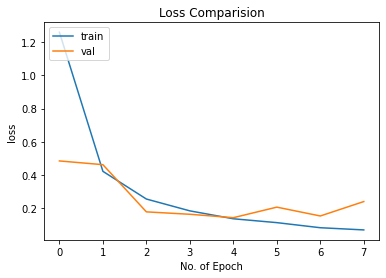

In [12]:
# training and loss value
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Comparision')
plt.legend(['train','val'],loc='upper left')
plt.xlabel('No. of Epoch')
plt.ylabel('loss')
plt.show()

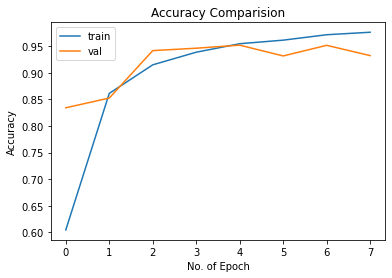

In [13]:
# training and accuracy value
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy Comparision')
plt.legend(['train','val'],loc='upper left')
plt.xlabel('No. of Epoch')
plt.ylabel('Accuracy')
plt.show()



In [ ]:
labels = []
predictions = []
for x,y in test_gen:
    labels.append(list(y.numpy()))
    predictions.append(tf.argmax(model.predict(x),1).numpy())

In [ ]:
predictions = list(itertools.chain.from_iterable(predictions))
labels = list(itertools.chain.from_iterable(labels))

In [ ]:
print("Train Accuracy  : {:.2f} %".format(history.history['accuracy'][-1]*100))
print("Test Accuracy   : {:.2f} %".format(accuracy_score(labels, predictions) * 100))
print("Precision Score : {:.2f} %".format(precision_score(labels, predictions, average='micro') * 100))
print("Recall Score    : {:.2f} %".format(recall_score(labels, predictions, average='micro') * 100))

Train Accuracy  : 95.99 %
Test Accuracy   : 93.88 %
Precision Score : 93.88 %
Recall Score    : 93.88 %


# **Confusion**

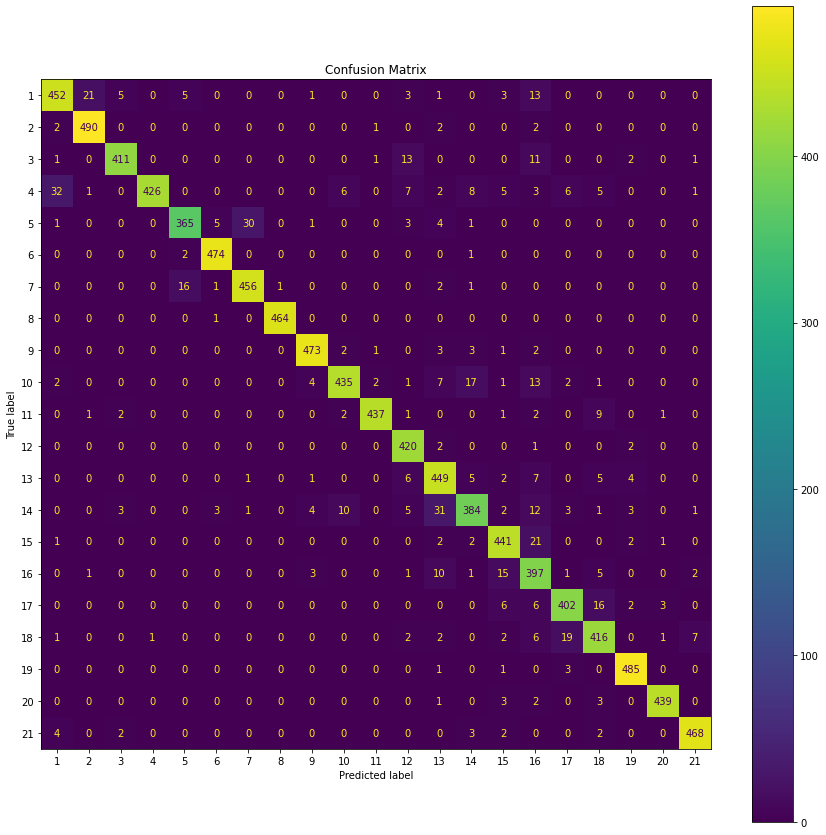

In [ ]:
cm = confusion_matrix(labels, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=list(range(1,39)))
fig, ax = plt.subplots(figsize=(15,15))
disp.plot(ax=ax)
plt.title("Confusion Matrix")
plt.show()

In [ ]:
test_gen_act = image_dataset_from_directory(directory="./PlantDiseaseDataset_Fake/test_act",
                                        image_size=(256, 256))

rescale = Rescaling(scale=1.0/255)

test_gen_act  = test_gen_act.map(lambda image,label:(rescale(image),label))

Found 33 files belonging to 21 classes.


In [19]:
labels = []
predictions = []
for x,y in test_gen_act:
    labels.append(list(y.numpy()))
    predictions.append(tf.argmax(model.predict(x),1).numpy())

In [20]:
predictions = list(itertools.chain.from_iterable(predictions))
labels = list(itertools.chain.from_iterable(labels))

In [21]:
print("Test Accuracy   : {:.2f} %".format(accuracy_score(labels, predictions) * 100))
print("Precision Score : {:.2f} %".format(precision_score(labels, predictions, average='micro') * 100))
print("Recall Score    : {:.2f} %".format(recall_score(labels, predictions, average='micro') * 100))

Test Accuracy   : 81.82 %
Precision Score : 81.82 %
Recall Score    : 81.82 %


***References***
<br>
1) https://github.com/Abhishek-st/Skin-Lesion-Analysis/tree/master/ipynb_architecture_training
<br>
2) https://www.kaggle.com/vishnu0399/leaf-disease-classification-cnn-96-accuracy